# How Dropout Improves Generalisation in Convolutional Neural Networks  
### A Comparative Study Using MNIST  
 


## 1. Import Required Libraries  
In this section, we import all Python libraries needed for data processing, model building, training, and visualisation.  


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## 2. Load and Preprocess the MNIST Dataset  
The MNIST dataset consists of 70,000 grayscale digit images (28×28 pixels).  
We normalise pixel intensities and reshape the data for CNN input.  


In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalise images
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape for CNN input: (batch, height, width, channels)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

x_train.shape, x_test.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

## 3. CNN Model Without Dropout  
This baseline model intentionally omits dropout, allowing us to observe **overfitting**.  
Architecture:  
- Conv2D → ReLU  
- Conv2D → ReLU  
- MaxPool  
- Conv2D → ReLU  
- Conv2D → ReLU  
- MaxPool  
- Dense → Dense  


In [4]:
def build_cnn_no_dropout():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model_no_dropout = build_cnn_no_dropout()
model_no_dropout.summary()


C:\Users\ksand\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 467,818 (1.78 MB)

 Trainable params: 467,818 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Train the CNN Without Dropout  
This model is expected to **overfit**, showing a large difference between training and validation performance.  


In [5]:
history_no = model_no_dropout.fit(
    x_train, y_train,
    epochs=6,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)


Epoch 1/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 250s 652ms/step - accuracy: 0.9391 - loss: 0.1950 - val_accuracy: 0.9842 - val_loss: 0.0548
Epoch 2/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 131s 302ms/step - accuracy: 0.9857 - loss: 0.0461 - val_accuracy: 0.9852 - val_loss: 0.0498
Epoch 3/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 112s 299ms/step - accuracy: 0.9898 - loss: 0.0309 - val_accuracy: 0.9858 - val_loss: 0.0468
Epoch 4/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 139s 290ms/step - accuracy: 0.9926 - loss: 0.0223 - val_accuracy: 0.9902 - val_loss: 0.0354
Epoch 5/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 151s 315ms/step - accuracy: 0.9946 - loss: 0.0169 - val_accuracy: 0.9917 - val_loss: 0.0298
Epoch 6/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 112s 299ms/step - accuracy: 0.9957 - loss: 0.0130 - val_accuracy: 0.9903 - val_loss: 0.0350


## 5. Training Curves (No Dropout)  
We visualise training and validation accuracy/loss to identify signs of overfitting.  


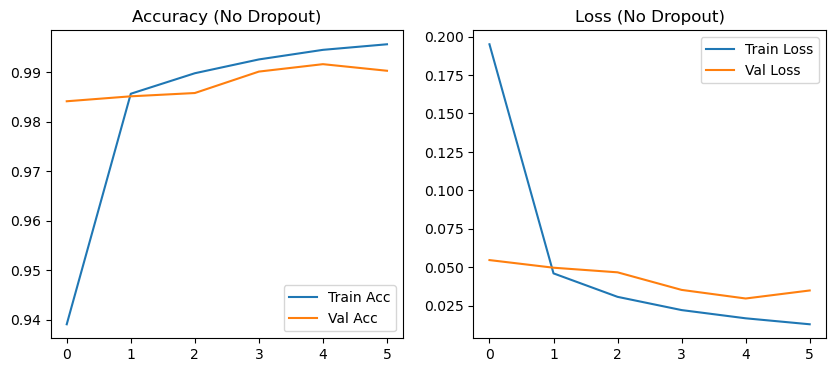

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_no.history['accuracy'], label='Train Acc')
plt.plot(history_no.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy (No Dropout)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_no.history['loss'], label='Train Loss')
plt.plot(history_no.history['val_loss'], label='Val Loss')
plt.title("Loss (No Dropout)")
plt.legend()

plt.savefig("training_curves_no_dropout.png", dpi=300, bbox_inches='tight')
plt.show()


## 6. CNN Model With Dropout  
We add **Dropout(0.5)** after the dense layer to reduce co-adaptation of neurons.  
This forces the network to generalise better.  


In [16]:
from tensorflow.keras import Input

def build_cnn_with_dropout():
    inputs = Input(shape=(28,28,1))

    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_dropout = build_cnn_with_dropout()
model_dropout.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 467,818 (1.78 MB)

 Trainable params: 467,818 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

## 7. Train the CNN With Dropout  
This model should generalise better than the baseline model.  


In [17]:
history_do = model_dropout.fit(
    x_train, y_train,
    epochs=6,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 209ms/step - accuracy: 0.9046 - loss: 0.3085 - val_accuracy: 0.9818 - val_loss: 0.0635
Epoch 2/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 218ms/step - accuracy: 0.9734 - loss: 0.0911 - val_accuracy: 0.9886 - val_loss: 0.0404
Epoch 3/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 219ms/step - accuracy: 0.9816 - loss: 0.0639 - val_accuracy: 0.9896 - val_loss: 0.0359
Epoch 4/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 86s 230ms/step - accuracy: 0.9861 - loss: 0.0489 - val_accuracy: 0.9904 - val_loss: 0.0360
Epoch 5/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 137s 217ms/step - accuracy: 0.9877 - loss: 0.0421 - val_accuracy: 0.9904 - val_loss: 0.0353
Epoch 6/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 220ms/step - accuracy: 0.9899 - loss: 0.0340 - val_accuracy: 0.9910 - val_loss: 0.0367


## 8. Training Curves (With Dropout)  
Observe improved generalisation and reduced overfitting.  


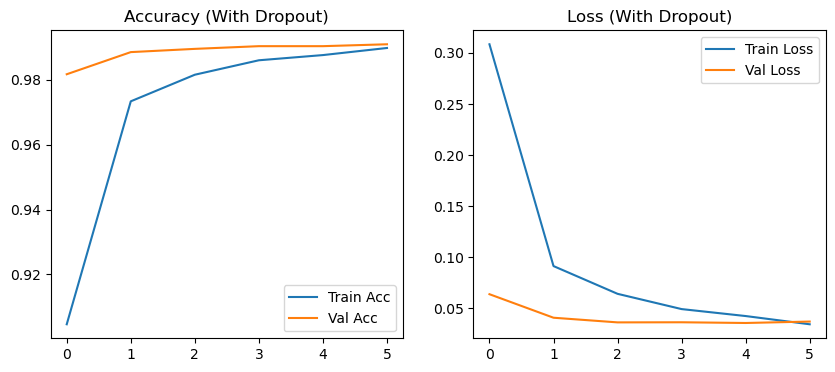

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_do.history['accuracy'], label='Train Acc')
plt.plot(history_do.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy (With Dropout)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_do.history['loss'], label='Train Loss')
plt.plot(history_do.history['val_loss'], label='Val Loss')
plt.title("Loss (With Dropout)")
plt.legend()

plt.savefig("training_curves_with_dropout.png", dpi=300, bbox_inches='tight')
plt.show()


## 9. Evaluate Both Models on Test Set  
This allows us to quantify improvement in generalisation when dropout is applied.  


In [19]:
test_no = model_no_dropout.evaluate(x_test, y_test, verbose=0)
test_do = model_dropout.evaluate(x_test, y_test, verbose=0)

print("Test Accuracy (No Dropout):", test_no[1])
print("Test Accuracy (With Dropout):", test_do[1])


Test Accuracy (No Dropout): 0.9908999800682068
Test Accuracy (With Dropout): 0.9926999807357788


## 10. Confusion Matrices  
We visualise class-wise performance for both models.  


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


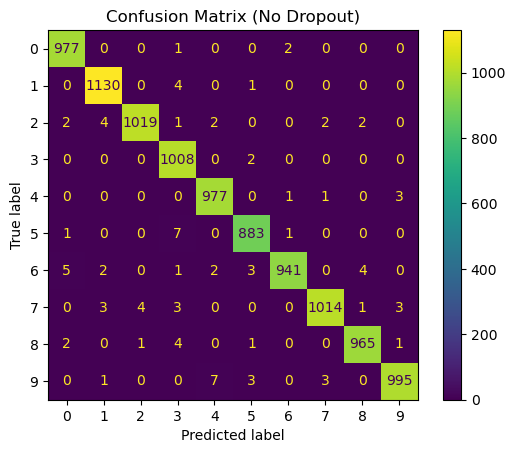

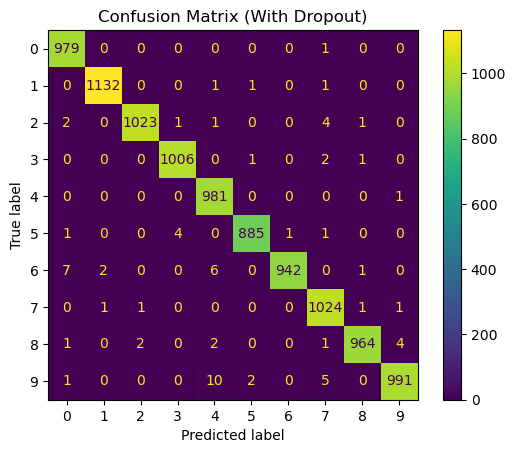

In [20]:
# Predictions for confusion matrices
y_pred_no = model_no_dropout.predict(x_test).argmax(axis=1)
y_pred_do = model_dropout.predict(x_test).argmax(axis=1)

# No Dropout
cm_no = confusion_matrix(y_test, y_pred_no)
disp_no = ConfusionMatrixDisplay(cm_no)
disp_no.plot()
plt.title("Confusion Matrix (No Dropout)")
plt.savefig("confusion_matrix_no_dropout.png", dpi=300, bbox_inches='tight')
plt.show()

# With Dropout
cm_do = confusion_matrix(y_test, y_pred_do)
disp_do = ConfusionMatrixDisplay(cm_do)
disp_do.plot()
plt.title("Confusion Matrix (With Dropout)")
plt.savefig("confusion_matrix_with_dropout.png", dpi=300, bbox_inches='tight')
plt.show()


## 11. Misclassified Digits  
We visualise common mistakes made by both models.  


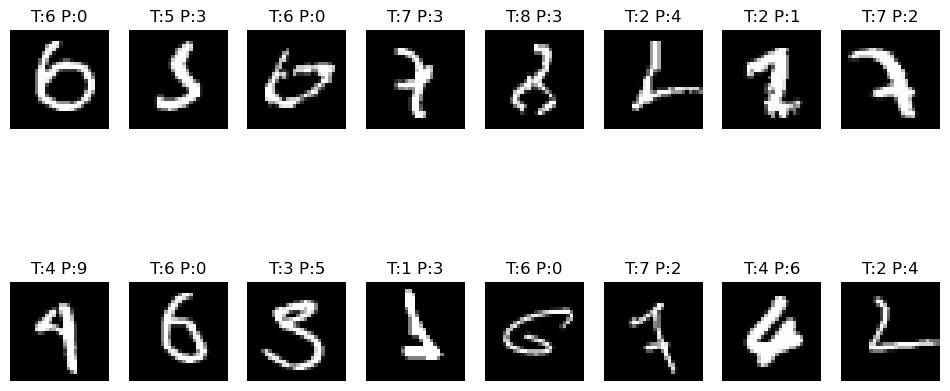

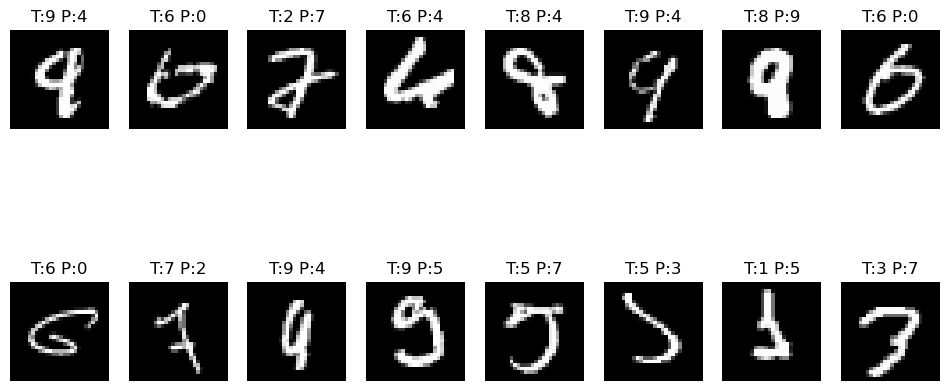

In [21]:
errors_no = np.where(y_pred_no != y_test)[0][:16]
errors_do = np.where(y_pred_do != y_test)[0][:16]

plt.figure(figsize=(12,6))

for i, idx in enumerate(errors_no):
    plt.subplot(2, 8, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"T:{y_test[idx]} P:{y_pred_no[idx]}")
    plt.axis('off')

plt.savefig("misclassified_no_dropout.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,6))
for i, idx in enumerate(errors_do):
    plt.subplot(2, 8, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"T:{y_test[idx]} P:{y_pred_do[idx]}")
    plt.axis('off')

plt.savefig("misclassified_with_dropout.png", dpi=300, bbox_inches='tight')
plt.show()


## 12. Feature Map Visualisation  
We extract and visualise feature maps from the first convolutional layers.  
This helps us understand what the CNN learns at early stages.  


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Feature map shape: (1, 28, 28, 32)


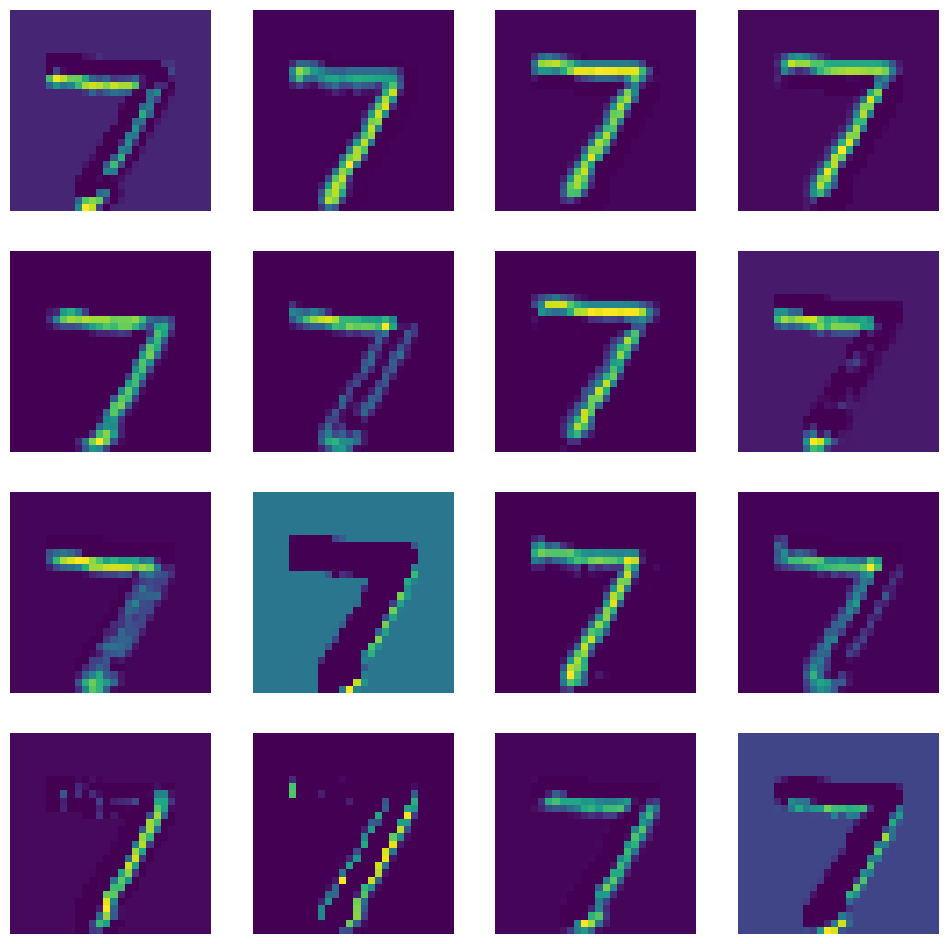

In [24]:
# Ensure model is built
model_dropout.predict(x_test[:1])

# Extract feature maps from FIRST Conv layer (layer index 1)
feature_model = models.Model(
    inputs=model_dropout.input,
    outputs=model_dropout.layers[1].output
)

# Pick an image
test_img = x_test[0:1]

# Predict feature maps
feature_maps = feature_model.predict(test_img)

print("Feature map shape:", feature_maps.shape)

# Plot first 16 feature maps
plt.figure(figsize=(12,12))
num_filters = feature_maps.shape[-1]  # should be 32

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.savefig("feature_maps_conv1.png", dpi=300, bbox_inches='tight')
plt.show()


## 13. Dropout Rate Comparison  
We test dropout values 0.0, 0.3, and 0.5 to observe the effect on test accuracy.  


In [25]:
from tensorflow.keras import Input

results = {}

for rate in [0.0, 0.3, 0.5]:
    print(f"\nTraining with dropout rate = {rate}")

    model = models.Sequential([
        Input(shape=(28,28,1)),                      # <-- FIXED

        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(rate),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    model.fit(x_train, y_train, epochs=3, batch_size=128, verbose=0)
    
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    results[rate] = acc

results



Training with dropout rate = 0.0

Training with dropout rate = 0.3

Training with dropout rate = 0.5


{0.0: 0.9878000020980835, 0.3: 0.9891999959945679, 0.5: 0.9879999756813049}